In [7]:
import random
import matplotlib.pyplot as plt
import regular_sudoku_different_sizes as rs
import pandas as pd

pygame 2.3.0 (SDL 2.24.2, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Runtime complexity Analysis
#### The Big Omega analysis for the solver is Omega(1) since the first solution may be the correct solution for the solver.

#### The Big Theta analysis for the solver is Theta(m*m) where m is the number of rows in the board. On an average the tests show that the iterations are around 81 for size 9.

#### The Big O analysis for the board is O(infinity) where the board may produce the puzzle boards infinitely.

## The run samples

#### This method runs the number of games specified times

In [8]:
def run_game(no_of_games):
    x_list = []
    y_list = []
    for i in range(0, no_of_games):
        SIZE = 9
        level = random.randint(1, 4)
        print('Difficulty level ', level)
        sudoku = rs.Sudoku(SIZE, level)
        x_list.append(i + 1)
        y_list.append(sudoku.total_iter)
    return x_list, y_list


#### For 10 games the Analysis is as shown

In [9]:
x_list, y_list = run_game(10)
plt.plot(x_list, y_list)
plt.xlabel(' Game number ')
plt.ylabel(' Number of iterations ')
plt.title(' Analysis graph')
plt.show()

In [10]:
x_list

In [11]:
y_list

In [12]:
xy_df = pd.DataFrame(y_list, index= x_list )
xy_df

Difficulty level  4
---------Sandwich----------------
[31, 0, 16, 7, 11, 18, 10, 0, 12] [13, 24, 11, 0, 5, 0, 18, 22, 13]
-----------------------------------
valid and solved board, hidden to player
- - - - - - - - - - - - 
4 1 7  | 2 8 6  | 5 3 9
5 6 9  | 1 3 4  | 2 8 7
3 2 8  | 9 7 5  | 4 1 6
- - - - - - - - - - - - 
2 4 3  | 5 6 8  | 9 7 1
8 5 1  | 7 4 9  | 3 6 2
9 7 6  | 3 2 1  | 8 5 4
- - - - - - - - - - - - 
6 9 2  | 8 1 3  | 7 4 5
7 8 4  | 6 5 2  | 1 9 3
1 3 5  | 4 9 7  | 6 2 8
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  2
solutions remaining to be solved:  1
Difficulty level  3
---------Sandwich----------------
[20, 19, 4, 0, 6, 0, 2, 17, 25] [17, 9, 31, 4, 0, 3, 28, 13, 13]
-----------------------------------
valid and solved board, hidden to player
- - - - - - - - - - - - 
5 9 4  | 2 8 6  | 1 7 3
8 6 1  | 5 3 7  | 4 9 2
2 3 7  | 9 4 1  | 6 5 8
- - - - - - - - - - - - 
9 1 2  | 4 7 3  | 8 6 5
7 8 5  | 1 6 9  | 3 2 4
6 4 3  | 8 2 5  | 7 1 9
- - - -

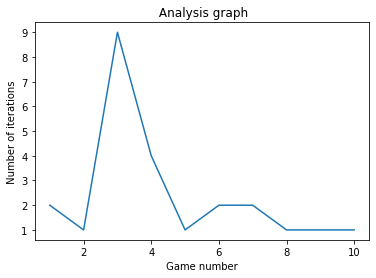

In [13]:
xy_df.describe()

#### For 50 games the Analysis is as shown

In [14]:
x_list, y_list = run_game(50)
plt.plot(x_list, y_list)
plt.xlabel(' Game number ')
plt.ylabel(' Number of iterations ')
plt.title(' Analysis graph')
plt.show()

[2, 1, 9, 4, 1, 2, 2, 1, 1, 1]

In [15]:
x_list

,0
1,2
2,1
3,9
4,4
5,1
6,2
7,2
8,1
9,1
10,1


In [16]:
y_list

,0
count,10.000000
mean,2.400000
std,2.503331
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,9.000000


In [17]:
xy_df = pd.DataFrame(y_list, index=x_list )
xy_df

Difficulty level  1
valid and solved board, hidden to player
- - - - - - - - - - - - 
5 1 2  | 7 3 8  | 4 6 9
4 6 7  | 1 5 9  | 2 8 3
8 9 3  | 2 4 6  | 5 7 1
- - - - - - - - - - - - 
3 7 9  | 4 1 5  | 6 2 8
2 4 5  | 6 8 3  | 1 9 7
1 8 6  | 9 7 2  | 3 4 5
- - - - - - - - - - - - 
6 5 8  | 3 2 7  | 9 1 4
7 2 1  | 5 9 4  | 8 3 6
9 3 4  | 8 6 1  | 7 5 2
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  1
Difficulty level  4
---------Sandwich----------------
[35, 6, 21, 16, 7, 0, 0, 0, 5] [35, 0, 31, 3, 19, 13, 5, 2, 4]
-----------------------------------
valid and solved board, hidden to player
- - - - - - - - - - - - 
9 2 4  | 5 7 8  | 6 3 1
8 7 1  | 6 9 3  | 2 5 4
5 3 6  | 1 2 4  | 8 7 9
- - - - - - - - - - - - 
4 9 5  | 3 8 1  | 7 6 2
2 1 7  | 9 5 6  | 4 8 3
3 6 8  | 2 4 7  | 1 9 5
- - - - - - - - - - - - 
7 8 3  | 4 1 9  | 5 2 6
6 4 2  | 8 3 5  | 9 1 7
1 5 9  | 7 6 2  | 3 4 8
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  2
solutions r

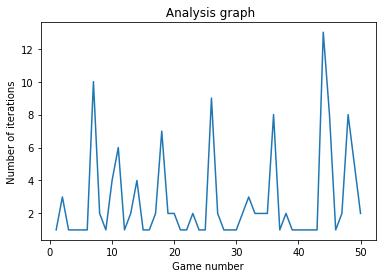

In [18]:
xy_df.describe()

#### For 100 games the Analysis is as shown

In [19]:
x_list, y_list = run_game(100)
plt.plot(x_list, y_list)
plt.xlabel(' Game number ')
plt.ylabel(' Number of iterations ')
plt.title(' Analysis graph')
plt.show()

[1,
 3,
 1,
 1,
 1,
 1,
 10,
 2,
 1,
 4,
 6,
 1,
 2,
 4,
 1,
 1,
 2,
 7,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 9,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 8,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 13,
 8,
 1,
 2,
 8,
 5,
 2]

In [20]:
x_list

,0
1,1
2,3
3,1
4,1
5,1
6,1
7,10
8,2
9,1
10,4


In [21]:
y_list

,0
count,50.00000
mean,2.78000
std,2.83772
min,1.00000
25%,1.00000
50%,2.00000
75%,2.75000
max,13.00000


In [22]:
xy_df = pd.DataFrame(y_list, index=x_list, )
xy_df

Difficulty level  2
valid and solved board, hidden to player
- - - - - - - - - - - - 
6 4 1  | 8 9 5  | 3 7 2
9 2 8  | 3 6 7  | 5 1 4
5 3 7  | 2 1 4  | 6 8 9
- - - - - - - - - - - - 
4 1 2  | 7 3 6  | 9 5 8
3 8 6  | 4 5 9  | 7 2 1
7 5 9  | 1 2 8  | 4 6 3
- - - - - - - - - - - - 
2 6 3  | 9 7 1  | 8 4 5
1 7 4  | 5 8 3  | 2 9 6
8 9 5  | 6 4 2  | 1 3 7
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  2
solutions remaining to be solved:  1
Difficulty level  2
valid and solved board, hidden to player
- - - - - - - - - - - - 
5 8 3  | 2 4 9  | 7 1 6
4 7 2  | 5 6 1  | 3 9 8
1 9 6  | 8 3 7  | 4 2 5
- - - - - - - - - - - - 
6 4 7  | 1 2 8  | 5 3 9
8 5 1  | 6 9 3  | 2 7 4
2 3 9  | 4 7 5  | 8 6 1
- - - - - - - - - - - - 
3 2 8  | 9 1 4  | 6 5 7
7 1 4  | 3 5 6  | 9 8 2
9 6 5  | 7 8 2  | 1 4 3
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  4
solutions remaining to be solved:  2
solutions remaining to be solved:  10
solutions remaining to be solved

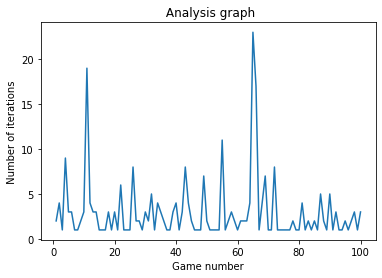

In [23]:
xy_df.describe()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]